***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Spring 2025

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [1]:
### Load some packages

import networkx as nx # for handling graphs/networks
import numpy as np # for basic scientific computing
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

# below is used for fancy figure titles using latex

# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     #"font.size"   : 15,
#     "text.usetex": True,  # use inline math for ticks
#     "pgf.rcfonts": False,  # don't setup fonts from rc parameters
#     "pgf.preamble": "\n".join([
#         "\\usepackage{units}",  # load additional packages
#         "\\usepackage{metalogo}",
#         "\\usepackage{unicode-math}",  # unicode math setup
#         r"\setmathfont{xits-math.otf}",
#         r"\setmainfont{DejaVu Serif}",  # serif font via preamble
#     ])
# })

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# BFS and DFS

In [2]:
def DFS(G, s, visited=None):  #function for DFS
    if visited is None:
        visited = []
    ### Depth-first-search
    if s not in visited:
        visited.append(s)
        for u in list(G.neighbors(s)):
            visited = DFS(G, u, visited=visited) # recursive call of DFS
    return visited

In [3]:
def BFS(G, s): #function for BFS
    queue = []
    visited = []
    visited.append(s)
    queue.append(s)
    while len(queue)>0:   # Creating loop to visit each node
        v = queue.pop(0)  # first remaining entry in queue
        for u in G.neighbors(v):
            if u not in visited:
                visited.append(u)
                queue.append(u)
    return visited

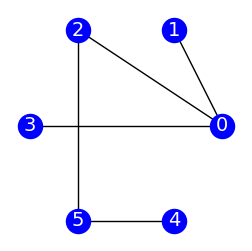

In [4]:
import networkx as nx # for handling graphs/networks
import numpy as np # for basic scientific computing
import matplotlib.pyplot as plt # for plotting

# Create a simple graph object G
G = nx.Graph()

# Start adding edges (cf. Python counts things from 0 not one.)
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(2,5)
G.add_edge(4,5)

# plot the graph
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [5]:
DFS(G, 3)

[3, 0, 1, 2, 5, 4]

In [6]:
BFS(G, 0)

[0, 1, 2, 3, 5, 4]

In [7]:
DFS(G, 4)

[4, 5, 2, 0, 1, 3]

In [8]:
BFS(G, 4)

[4, 5, 2, 0, 1, 3]

## Using BFS and DFS to compute connected components

In [9]:
# Initialize graph
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

FileNotFoundError: ../Data/Caltech36.txt not found.

In [ ]:
# plot the graph
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.spring_layout(G), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [ ]:
n_cc = len(sorted(nx.connected_components(G), key=len, reverse=True))
print("Number of connected components in G:", n_cc) # Verify the result with the plot above

In [ ]:
def compute_connected_components(G):
    ### compute all connected components of G
    ### output = dictionary of {component index : nodes in the component}
    nodes = list(G.nodes())
    connected_components = {}
    remaining_nodes = list(G.nodes())
    i = 0
    while len(remaining_nodes) > 0 :
        comp = DFS(G,remaining_nodes[0])
        connected_components.update({i: comp.copy()})
        remaining_nodes = [v for v in remaining_nodes if v not in comp]
        i += 1
    for i in connected_components.keys():
        print("Size of the {}th component = {}".format(i, len(connected_components.get(i))))
    return connected_components

In [ ]:
connected_components = compute_connected_components(G)

In [ ]:
H = G.subgraph(nodes=connected_components.get(0))

# plot the graph
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(H, ax=ax, pos=nx.spring_layout(H), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [ ]:
H = G.subgraph(nodes=connected_components.get(1))

# plot the graph
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(H, ax=ax, pos=nx.spring_layout(H), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [ ]:
H = G.subgraph(nodes=connected_components.get(2))

# plot the graph
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(H, ax=ax, pos=nx.spring_layout(H), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [ ]:
### Load Caltech and compute all connected components
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "/content/drive/My Drive/Senior Year/Spring 2025/Math 444/Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

connected_components = compute_connected_components(G)

### Plot the original graph and all connected components

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(connected_components)+1, wspace=0.2, hspace=0.1)

for i in np.arange(len(connected_components)+1):
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])

    if i == 0:
        H = G
        ax.set_title("$\\textsc{\\texttt{Caltech}}$"
                     +"\n" + "nodes = {}".format(len(H.nodes))
                     +"\n" + "edges = {}".format(len(H.edges)), fontsize=9)
    else:
        H = G.subgraph(nodes=connected_components.get(i-1))
        ax.set_title(r"{}th connected comp.".format(i-1)
                     +"\n" + "nodes = {}".format(len(H.nodes))
                     +"\n" + "edges = {}".format(len(H.edges)), fontsize=9)


    ## Plot the (sub)graphs

    edges = H.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.spring_layout(H))
    #ax.legend()

plt.savefig("Caltech_connected_comps", bbox_inches="tight")

## Using BFS and DFS to compute spanning trees

*To install graphviz on Apple sillicon macs*, do

(install homebrew)

brew install graphviz

conda install python-graphviz

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 4)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()

In [ ]:
nx.draw(T, pos = nx.spring_layout(T))

In [ ]:
def Spanning_tree_BFS(G, s): #function for BFS
    queue = []
    visited = []
    edges_T = []
    visited.append(s)
    queue.append(s)
    while len(queue)>0:   # Creating loop to visit each node
        v = queue.pop(0)  # first remaining entry in queue
        for u in G.neighbors(v):
            if u not in visited:
                visited.append(u)
                queue.append(u)
                edges_T.append([u,v])
    return visited, edges_T

In [ ]:
def Spanning_tree_DFS(G, s, visited=None, edges_T=None):  #function for DFS
    if visited is None:
        visited = []
        edges_T = []
    if s not in visited:
        visited.append(s)
        for u in list(G.neighbors(s)):
            if u not in visited:
                edges_T.append([s,u])
            visited, edges_T = Spanning_tree_DFS(G, u, visited=visited, edges_T=edges_T) # recursive call of DFS
    return visited, edges_T

In [ ]:
G = nx.erdos_renyi_graph(n=20,p=0.2)
nx.draw(G, with_labels=True)

In [ ]:
visited, edges_T = Spanning_tree_DFS(G, list(G.nodes())[0])


In [ ]:
visited

In [ ]:
edges_T

In [ ]:
T = nx.Graph()
for e in edges_T:
    T.add_edge(e[0], e[1])

In [ ]:
# plot the graph
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(T, ax=ax, pos=graphviz_layout(T, prog="fdp"), with_labels=True,
                 node_size=200, node_color="blue", font_size=14, font_color="white")
# If you find trouble installing and using graphviz, use the built-in networkx layouts
# by replaving "graphviz_layout(T, prog="fdp")" with "nx.spring_layout(T)"
plt.axis('off');

In [ ]:
## Initialize graph
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

## Compute BFS spanning tree

visited, edges_T = Spanning_tree_BFS(G, list(G.nodes())[0])

T = nx.Graph()
for e in edges_T:
    T.add_edge(e[0], e[1])

In [ ]:
# plot the graph
fig = plt.figure(figsize=[8, 8], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(T, ax=ax, pos=graphviz_layout(T, prog="fdp"), with_labels=False,
                 node_size=3, node_color="blue", font_size=14, font_color="white")
# If you find trouble installing and using graphviz, use the built-in networkx layouts
# by replaving "graphviz_layout(T, prog="fdp")" with "nx.spring_layout(T)"
plt.axis('off');

In [ ]:
### Load Caltech and compute all connected components
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str))

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1])

### Plot the original graph and all connected components

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, hspace=0.1)

for i in range(2):
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])

    if i == 0:
        ## Compute BFS spanning tree
        visited, edges_T = Spanning_tree_BFS(G, list(G.nodes())[0])
        ax.set_title("$\\textsc{\\texttt{Caltech}}$ - BFS spanning tree", fontsize=10)
    else:
        visited, edges_T = Spanning_tree_DFS(G, list(G.nodes())[0])
        ax.set_title("$\\textsc{\\texttt{Caltech}}$ - DFS spanning tree", fontsize=10)

    T = nx.Graph()
    for e in edges_T:
        T.add_edge(e[0], e[1])

    edges = T.edges()
    weights = [0.5 for u,v in T.edges]
    nx.draw(T, with_labels=False, width=weights, node_size=5, ax=ax, label='Graph', pos=graphviz_layout(T, prog="fdp"))
    #ax.legend()

plt.savefig("Caltech_spanning_trees", bbox_inches="tight")

# Kruskal's MST algorithm

In [ ]:
def Kruskal_MST(wtd_edgelist):
    ### Kruskal's MST algorithm
    ### input = list of weighted edges; nodes need to be indexed by integers
    ## "find_root" and "forest_add_edge" maintain rooted forest structure to efficiently check
    ## whether adding a new edge  introduces a cycle

    def find_root(parent, i):
        if parent[i] == i:
            return i
        return find(parent, parent[i])

    def forest_add_edge(parent, rank, x, y):
        xroot = find_root(parent, x)
        yroot = find_root(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
        return parent, rank

    result = []
    i, e = 0, 0
    # Sort weighted edges
    wtd_edgelist = sorted(wtd_edgelist, key=lambda item: item[2])
    parent = []
    rank = []
    nodes = list(set([v[0] for v in wtd_edgelist] + [v[1] for v in wtd_edgelist]))
    # Important for find ft. that nodes in this list is in increasing order
    for node in nodes:
        parent.append(node)
        rank.append(0)
    while e < len(parent) - 1:
        u, v, w = wtd_edgelist[i]
        i = i + 1
        x = find_root(parent, u)
        y = find_root(parent, v)
        if x != y:
            e = e + 1
            result.append([u, v, w])
            parent, rank = forest_add_edge(parent, rank, x, y)

    return result

In [ ]:
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)

fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
pos=nx.spring_layout(G)
nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True,
                 node_size=200, node_color="blue", font_size=14, font_color="white")
plt.axis('off');
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [ ]:
wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

result = Kruskal_MST(wtd_edgelist)

In [ ]:
result

In [ ]:
T = nx.Graph()
for e in result:
    T.add_edge(e[0], e[1], weight=e[2])

In [ ]:
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
pos=nx.spring_layout(T)
nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True,
                 node_size=200, node_color="blue", font_size=14, font_color="white")
plt.axis('off');
labels = nx.get_edge_attributes(T,'weight');
nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);

In [ ]:
### Load Caltech and compute all connected components
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)
G.add_edge(6, 2, weight=1)

wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

### Plot the original graph and all connected components

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, hspace=0.1)

for i in range(2):
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])

    if i == 0:
        ## Plot the original weighted graph
        ax.set_title("Input graph", fontsize=10)
        pos=nx.spring_layout(G)
        nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True,
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(G,'weight');
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);


    else:  ## plot MST
        ax.set_title("MST", fontsize=10)

        result = Kruskal_MST(wtd_edgelist)
        T = nx.Graph()
        for e in result:
            T.add_edge(e[0], e[1], weight=e[2])

        #pos=nx.spring_layout(T)
        nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True,
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(T,'weight');
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);



plt.savefig("MST_ex1", bbox_inches="tight")

In [ ]:
### Load Caltech and compute all connected components
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)

wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

### Plot the original graph and all connected components

fig = plt.figure(figsize=[12,3], constrained_layout=False)
network_list = [""]
steps = 2
outer_grid = gridspec.GridSpec(nrows=1, ncols=steps+2, wspace=0.2, hspace=0.1)

for i in range(steps+2):
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])

    edges_T = Kruskal_MST(wtd_edgelist)


    if i == 0:
        ## Plot the original weighted graph
        ax.set_title("Input graph", fontsize=10)
        pos=nx.spring_layout(G)
        nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True,
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(G,'weight');
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);


    else:  ## plot MST

        T = nx.Graph()
        T.add_nodes_from(G)
        edges_T1 = edges_T[:len(edges_T)-steps+i-1]
        for e in edges_T1:
            T.add_edge(e[0], e[1], weight=e[2])

        if i < steps+1:
            ax.set_title("MST-{}".format(-steps+i-1), fontsize=10)
        else:
            ax.set_title("MST", fontsize=10)

        #pos=nx.spring_layout(T)
        nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True,
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(T,'weight');
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);



plt.savefig("MST_ex1", bbox_inches="tight")

# Node embedding

In [ ]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(c))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

def SBM(W, c):
    # Stochastic block model;
    # W = (k x k) community weight matrix
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)

    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # C = (n x n) probability matrix = expected adjacency matrix = C W C.T
    P = C @ W @ C.T

    # Now sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())

    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [ ]:
a = 0.8
b = 0.2
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

In [ ]:
nx.draw(G)

In [ ]:
A = nx.adjacency_matrix(G).todense()
plt.imshow(A)

In [ ]:
def permute_nodes(G):
    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: np.random.random())))
    G1 = nx.Graph()
    G1.add_nodes_from(list(G.nodes()))
    #nodes = list(G.nodes())

    for e in G.edges():
        u = node_mapping.get(e[0])
        v = node_mapping.get(e[1])
        G1.add_edge(u,v)
    return G1

In [ ]:
G_permuted = permute_nodes(G)

In [ ]:
A_permuted = nx.adjacency_matrix(G_permuted).todense()
plt.imshow(A_permuted)

## Laplacian spectral embedding

In [ ]:
L = nx.normalized_laplacian_matrix(G).todense()
w, v = np.linalg.eigh(L)
plt.imshow(v)

In [ ]:
L = nx.normalized_laplacian_matrix(G_permuted).todense()
plt.imshow(L)

In [ ]:
w_per, v_per = np.linalg.eigh(L)
plt.imshow(v_per)

In [ ]:
plt.imshow(v_per[:,:3])

In [ ]:
print("eigenvalues="+"\n", w_per)

In [ ]:
plt.plot(w_per)

In [ ]:
def plot_vectors_together(w, w_per, labels=None, figsize=(5, 5),
                         styles=None, title="Vector Comparison"):
    """
    Plot two vectors together for comparison.

    Parameters:
    -----------
    w : array-like
        First vector to plot
    w_per : array-like
        Second vector to plot
    labels : list of str, optional
        Labels for the two vectors
    figsize : tuple, optional
        Figure size
    styles : list of str, optional
        Line styles for the two vectors
    title : str, optional
        Plot title
    """
    # Ensure inputs are numpy arrays
    w = np.array(w)
    w_per = np.array(w_per)

    # Check vectors have the same length
    if len(w) != len(w_per):
        raise ValueError("Vectors must have the same length")

    # Default labels if none provided
    if labels is None:
        labels = ['w', 'w_per']

    # Default styles if none provided
    if styles is None:
        styles = ['-o', '--x']

    # Create x-axis values (indices of vector elements)
    x = np.arange(len(w))

    # Create the figure
    plt.figure(figsize=figsize)

    # Plot both vectors
    plt.plot(x, w, styles[0], label=labels[0], markersize=8, linewidth=2)
    plt.plot(x, w_per, styles[1], label=labels[1], markersize=8, linewidth=2)

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(title)

    # Add legend
    plt.legend()

    # Add grid for better readability
    plt.grid(True, alpha=0.3)

    # Set x-axis ticks to integers if vector is not too long
    if len(w) <= 20:
        plt.xticks(x)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [ ]:
plot_vectors_together(w,w_per,title="Eivengalue comparison")

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse
from scipy.sparse.linalg import eigsh

def laplacian_spectral_embedding_3d(G, normalized=True, weight='weight'):
    """
    Compute the 3D Laplacian spectral embedding of a graph.

    Parameters:
    -----------
    G : networkx.Graph
        The input graph
    normalized : bool, optional (default=True)
        Whether to use the normalized Laplacian or not
    weight : string, optional (default='weight')
        Edge attribute key to use as weight

    Returns:
    --------
    embedding : numpy.ndarray
        The 3D embedding coordinates for each node
    """
    # Get the adjacency matrix as a scipy sparse matrix
    A = nx.to_scipy_sparse_array(G, weight=weight)

    # Compute the degree matrix
    degrees = np.array(A.sum(axis=1)).flatten()
    D = sparse.diags(degrees, 0)

    # Compute the Laplacian matrix
    L = D - A

    if normalized:
        # Compute normalized Laplacian: L_norm = D^(-1/2) L D^(-1/2)
        with np.errstate(divide='ignore'):
            D_inv_sqrt = sparse.diags(1.0 / np.sqrt(degrees), 0)
        # Replace infinite values with 0
        D_inv_sqrt.data[np.isinf(D_inv_sqrt.data)] = 0
        L_norm = D_inv_sqrt @ L @ D_inv_sqrt
        L = L_norm

    # Compute the eigenvectors and eigenvalues of the Laplacian
    # For the normalized Laplacian, we want the smallest eigenvalues
    # Skip the first eigenvalue (which is 0 for connected graphs)
    n_components = 3  # We want a 3D embedding
    try:
        eigenvalues, eigenvectors = eigsh(L, k=n_components+1, which='SM')
    except:
        # If it fails (perhaps the graph is too small), use regular eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(L.toarray())
        eigenvalues = eigenvalues[:n_components+1]
        eigenvectors = eigenvectors[:, :n_components+1]

    # Sort eigenvalues and corresponding eigenvectors
    idx = eigenvalues.argsort()
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Skip the first eigenvector (corresponds to eigenvalue 0 for connected graphs)
    # Take the next three eigenvectors for the 3D embedding
    embedding = eigenvectors[:, 1:n_components+1]

    return embedding

def plot_3d_embedding(G, embedding, node_color=None, node_size=100, edge_alpha=0.3,
                      with_labels=False, title="3D Laplacian Spectral Embedding",
                      figsize=(10, 8)):
    """
    Plot the 3D embedding of a graph.

    Parameters:
    -----------
    G : networkx.Graph
        The input graph
    embedding : numpy.ndarray
        The 3D embedding coordinates for each node
    node_color : list or array, optional
        Color of nodes
    node_size : int or array, optional
        Size of nodes
    edge_alpha : float, optional
        Transparency of edges
    with_labels : bool, optional
        Whether to show node labels
    title : string, optional
        Title of the plot
    figsize : tuple, optional
        Figure size
    """
    if node_color is None:
        # Color nodes based on their degree if no color is provided
        node_color = list(dict(G.degree()).values())

    # Create a 3D figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # Get node positions from embedding
    xs = embedding[:, 0]
    ys = embedding[:, 1]
    zs = embedding[:, 2]

    # Plot nodes
    scatter = ax.scatter(xs, ys, zs, c=node_color, s=node_size, cmap='viridis',
                         edgecolors='black', linewidths=0.5)

    # Add a colorbar if using node colors
    if node_color is not None:
        plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, label='Node Degree')

    # Plot edges
    for u, v in G.edges():
        u_idx = list(G.nodes).index(u)
        v_idx = list(G.nodes).index(v)
        ax.plot([xs[u_idx], xs[v_idx]], [ys[u_idx], ys[v_idx]], [zs[u_idx], zs[v_idx]],
                color='gray', alpha=edge_alpha)

    if with_labels:
        # Add node labels (be careful with large graphs)
        for i, node in enumerate(G.nodes()):
            ax.text(xs[i], ys[i], zs[i], str(node), fontsize=10)

    # Set labels and title
    ax.set_xlabel('Eigenvector 1')
    ax.set_ylabel('Eigenvector 2')
    ax.set_zlabel('Eigenvector 3')
    ax.set_title(title)

    # Show the plot
    plt.tight_layout()
    return fig, ax

In [ ]:
# Compute the 3D Laplacian spectral embedding
embedding = laplacian_spectral_embedding_3d(G, normalized=True)

# Plot the embedding
fig, ax = plot_3d_embedding(G, embedding, with_labels=True)


# Plot with community colors
fig, ax = plot_3d_embedding(G, embedding, node_color=c,
                           title="3D Laplacian Spectral Embedding with Communities")

plt.show()

In [ ]:
A = nx.adjacency_matrix(G).todense()
w, v = np.linalg.eigh(A)
plt.imshow(v)

In [ ]:
A = nx.adjacency_matrix(G).todense()
w, v = np.linalg.eigh(A@A@A)
plt.imshow(v)

In [ ]:
plt.imshow(L)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eigh(L)

In [ ]:
eigenvalues

In [ ]:
plt.imshow(eigenvectors)

In [ ]:
## Generate SBM graph
a = 0.9
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])
r = 10
c = [0]*r + [1]*r + [2]*r
G = SBM(W,c)

## Plot graph

fig = plt.figure(figsize=[10,2.5], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=4, wspace=0.3, hspace=0.1)

inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("SBM graph (nodes={}, edges={})".format(len(list(G.nodes())), len(list(G.edges())) ) , fontsize=10)

inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

A = nx.adjacency_matrix(G).todense()
w, v = np.linalg.eigh(A)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $A$"+ "\n" + "(increasing evals)" , fontsize=10)

inner_grid = outer_grid[0,2].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

L = nx.normalized_laplacian_matrix(G).todense()
w, v = np.linalg.eigh(L)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $L$' " + "\n" + "(increasing evals)" , fontsize=10)

inner_grid = outer_grid[0,3].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

L = nx.normalized_laplacian_matrix(G).todense()
w, v = np.linalg.eigh(-L)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $-L'$ " + "\n" + "(increasing evals)" , fontsize=10)

plt.savefig("SBM_spectrum", bbox_inches="tight")

In [ ]:
d = 2
U = np.array(eigenvectors[:, :d])

In [ ]:
plt.imshow(U)

In [ ]:
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)

#plt.ylim(-0.3,0.3)

#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



In [ ]:
# Generate SBM
a = 0.99
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

# Spectral Embedding
#L = nx.normalized_laplacian_matrix(G).todense()
A = nx.adjacency_matrix(G).todense()
eigenvalues, eigenvectors = LA.eig(A)
d = 2
U = np.array(eigenvectors[:, :d])

# Plot
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)


#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



In [ ]:
# Generate SBM
a = 0.9
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

# Spectral Embedding
#L = nx.normalized_laplacian_matrix(G).todense()
A = nx.adjacency_matrix(G).todense()
eigenvalues, eigenvectors = LA.eig(A)
d = 2
U = np.array(eigenvectors[:, :d])

# Plot
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)


#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



In [ ]:
fig = plt.figure(figsize=[11,3], constrained_layout=False)
network_list = [""]
r = 10
a = 0.99
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
c = [0]*r + [1]*r + [2]*r # community assignment vector
G = SBM(W, c)

outer_grid = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.3, hspace=0.2)

for i in np.arange(3):
    if i == 0: #plot the graph
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G.edges()
        weights = [0.2 for u,v in G.edges]
        nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
        #ax.legend()
        ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)


    elif i == 1: # Adjacency embedding
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])

        A = nx.adjacency_matrix(G).todense()
        w, v = np.linalg.eigh(A)
        U = np.array(v[:, -2:]) # evals are in increasing order

        offset = 0.002
        nodes = list(G.nodes())
        for i in np.arange(len(nodes)):
            x, y = U[i,:]
            ax.scatter(x, y, marker='.', color='red')
            ax.text(x+offset, y+offset, nodes[i], fontsize=9)
        ax.set_title(r"Adjacency Spectral embedding", fontsize=8)

    elif i == 2: # Laplacian embedding
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])

        L = nx.normalized_laplacian_matrix(G).todense()
        w, v = np.linalg.eigh(-L)
        U = np.array(v[:, -2:])

        offset = 0
        nodes = list(G.nodes())
        for i in np.arange(len(nodes)):
            x, y = U[i,:]
            ax.scatter(x, y, marker='.', color='red')
            ax.text(x+offset, y+offset, nodes[i], fontsize=9)
        ax.set_title(r"Laplacian Spectral embedding", fontsize=8)


plt.savefig("SBM_embedding", bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)):
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector

    G = SBM(W, c)
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)


    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex1", bbox_inches="tight")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a new graph
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(nodes)

# Add edges with weights
edges_with_weights = [
    ('A', 'B', 4),
    ('A', 'C', 3),
    ('B', 'C', 5),
    ('B', 'D', 2),
    ('B', 'E', 7),
    ('C', 'D', 6),
    ('C', 'F', 8),
    ('D', 'E', 3),
    ('D', 'F', 4),
    ('E', 'G', 6),
    ('F', 'G', 2)
]

for u, v, w in edges_with_weights:
    G.add_edge(u, v, weight=w)

# Create custom node positions
pos = {
    'A': (0, 0),
    'B': (1, 1),
    'C': (-1, 1),
    'D': (-1, -1),
    'E': (1, -1),
    'F': (-2, 0),
    'G': (2, 0)
}

# Set up the figure with a larger size
plt.figure(figsize=(6, 4))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue',
                       edgecolors='black', linewidths=2)

# Draw the edges
nx.draw_networkx_edges(G, pos, width=2)

# Draw the node labels
nx.draw_networkx_labels(G, pos, font_size=16, font_weight='bold')

# Draw the edge weight labels
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                             font_size=14, font_weight='bold',
                             bbox=dict(facecolor='white', edgecolor='black',
                                      boxstyle='round,pad=0.3'))

# Add a title
plt.title("Weighted Network for Kruskal's MST Problem", fontsize=16)

# Add a legend
legend_patch = mpatches.Patch(color='lightblue', label='Station')
weight_patch = mpatches.Patch(color='white', edgecolor='black', label='Connection Cost')
plt.legend(handles=[legend_patch, weight_patch], loc='upper right', fontsize=12)

# Remove the axis
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
def create_example_network():
    G = nx.DiGraph()

    # Add edges with capacities
    edges = [
        ('s', 'a', 4), ('s', 'b', 2),
        ('a', 'b', 1), ('a', 'c', 2), ('a', 'd', 4),
        ('b', 'd', 2),
        ('c', 't', 2),
        ('d', 't', 3)
    ]

    G.add_weighted_edges_from(edges)
    return G

def create_kruskal_network():
    G = nx.Graph()  # Using undirected graph for MST problem

    # Add edges with weights for Kruskal's MST problem
    edges = [
        ('A', 'B', 4), ('A', 'C', 3),
        ('B', 'C', 5), ('B', 'D', 2), ('B', 'E', 7),
        ('C', 'D', 6), ('C', 'F', 8),
        ('D', 'E', 3), ('D', 'F', 4),
        ('E', 'G', 6),
        ('F', 'G', 2)
    ]

    G.add_weighted_edges_from(edges)
    return G

def plot_network(G, flow=None):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw the graph
    nx.draw_networkx_nodes(G, pos)

    # Draw edges with labels
    if flow:
        edge_labels = {(u, v): f'{flow[u][v]}/{d["weight"]}'
                      for (u, v, d) in G.edges(data=True)}
    else:
        edge_labels = {(u, v): f'{d["weight"]}'
                      for (u, v, d) in G.edges(data=True)}

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=15)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    plt.title('Flow Network')
    plt.axis('off')
    plt.show()

# Create and visualize the network
G = create_example_network()
plot_network(G)

In [ ]:
G = nx.Graph()  # Using undirected graph for MST problem

# Add edges with weights for Kruskal's MST problem
edges = [
    ('A', 'B', 4), ('A', 'C', 3),
    ('B', 'C', 5), ('B', 'D', 2), ('B', 'E', 7),
    ('C', 'D', 6), ('C', 'F', 8),
    ('D', 'E', 3), ('D', 'F', 4),
    ('E', 'G', 6),
    ('F', 'G', 2)
]

G.add_weighted_edges_from(edges)

In [ ]:
plot_network(G)